In [42]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from sklearn.datasets import load_iris, load_diabetes

In [43]:
data = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')

In [45]:
data.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [46]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [47]:
data.shape

(200, 4)

In [48]:
data.dtypes

Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

## Preparation des données

In [51]:
x = data.copy()

In [52]:
numerical_columns = data.select_dtypes(exclude = 'object').columns
categorical_columns = data.select_dtypes(include = 'object').columns

In [53]:
scaler = StandardScaler()
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

In [54]:
encoder = LabelEncoder()
x['gender_encoded'] = encoder.fit_transform(x[categorical_columns].values.ravel())

## On garde que les colonnes Annual Income (k$)	et Spending Score (1-100) pour l'instant

In [55]:
x.drop(columns=['Gender'], inplace=True)

In [56]:
x.head()

,Age,Annual Income (k$),Spending Score (1-100),gender_encoded
CustomerID,,,,
1,-1.424569,-1.738999,-0.434801,1
2,-1.281035,-1.738999,1.195704,1
3,-1.352802,-1.700830,-1.715913,0
4,-1.137502,-1.700830,1.040418,0
5,-0.563369,-1.662660,-0.395980,0


In [59]:
k_range = range(1, 12)

inertia = list()

for k in k_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    inertia.append(kmeans.inertia_)

C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Wi

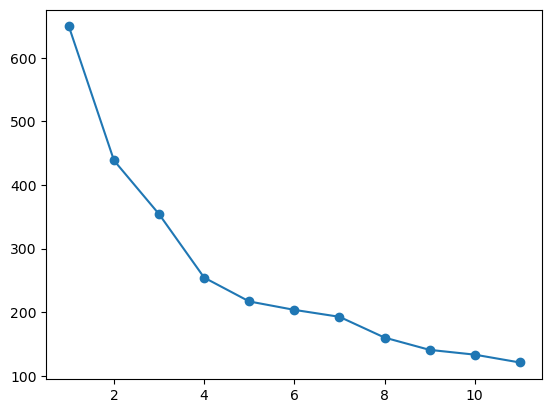

In [60]:
plt.plot(k_range, inertia, marker= 'o')

## On choisit k=5 (elbow)

In [61]:
kmeans = KMeans(n_clusters=5)

In [62]:
clients_labels = kmeans.fit_predict(x)

C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [64]:
clients_labels

array([3, 3, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 3, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 3,
       3, 0, 0, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 4, 1, 4, 4, 1, 4, 1, 4, 0, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int32)

In [65]:
centroids = kmeans.cluster_centers_

In [66]:
x

,Age,Annual Income (k$),Spending Score (1-100),gender_encoded
CustomerID,,,,
1,-1.424569,-1.738999,-0.434801,1
2,-1.281035,-1.738999,1.195704,1
3,-1.352802,-1.700830,-1.715913,0
4,-1.137502,-1.700830,1.040418,0
5,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
196,-0.276302,2.268791,1.118061,0
197,0.441365,2.497807,-0.861839,0
198,-0.491602,2.497807,0.923953,1


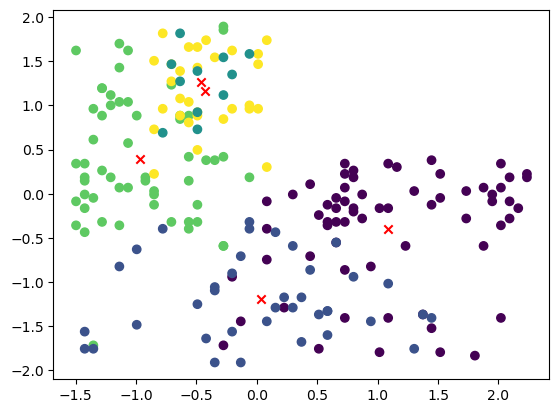

In [70]:
plt.scatter(x['Age'], x['Spending Score (1-100)'], c = clients_labels)
plt.scatter(centroids[: , 0],  centroids[:, 2], c= 'red', marker='x')

In [102]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3 )
x_pca = pca.fit_transform(x)
centroids_pca = pca.transform(centroids)

C:\Users\TEK-UP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


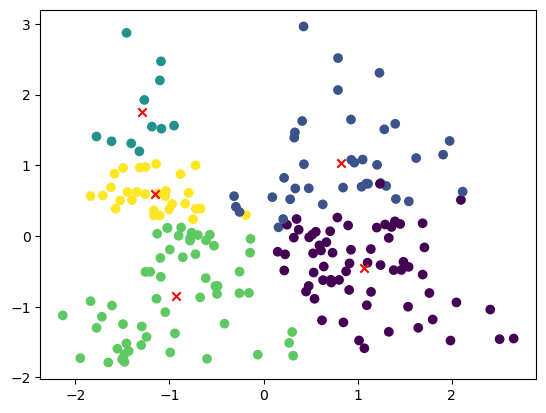

In [99]:
plt.scatter(x_pca[:, 0], x_pca[:, 1], c = clients_labels)
plt.scatter(centroids_pca[: , 0],  centroids_pca[:, 1], c= 'red', marker='x')

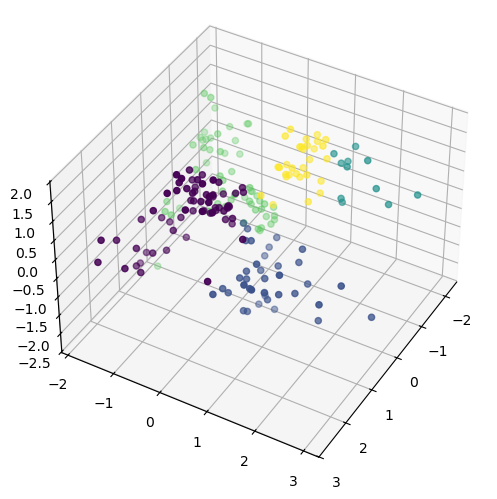

In [113]:

fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], x_pca[:, 2], c=clients_labels)
ax.view_init(elev = 40., azim = 30)